In [35]:
import sys
sys.path.append(r"C:\Users\49174\anaconda3\envs\praktikum\Lib\site-packages")
import torch
import numpy as np
from dataset_jacquard_samples import JacquardSamples
from utils import get_transform, get_inv_transform
from bce_model import BCEGraspTransformer
from utils_train import create_correct_false_points
import random
from pytorch_lightning.loggers import TensorBoardLogger
import matplotlib.pyplot as plt
from metrics_utils import * 
from infer_utils import * 
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
from matplotlib import cm

In [36]:
IMAGE_SIZE = 1120 
PATCH_DIM = IMAGE_SIZE //14
IDX = 3 #id of the object in the category
args_infer = {
    "model_path" : "runs/bottle_1_single.ckpt",
    "device" : "cuda",
    "img_size" : IMAGE_SIZE
}

In [37]:
split_train = r"Bottle_train/"
image_transform = get_transform()
inv_transform = get_inv_transform()
dataset_train = JacquardSamples(dataset_root= split_train ,image_transform=image_transform, num_targets=5, overfit=False,
                              img_size=args_infer["img_size"], idx=4)

In [38]:
vis_img = np.array(torch.permute(inv_transform(dataset_train[6]["img"]), (1, 2, 0)))

In [128]:
shape = [(555, 475), (605, 525)]
  
# creating new Image object
img = Image.new("RGB", (1120, 1120))
x = 580
y = 500
r = 5
leftUpPoint = (x-r, y-r)
rightDownPoint = (x+r, y+r)
twoPointList = [leftUpPoint, rightDownPoint]

x2 = 660
y2 = 552
r2 = 5
leftUpPoint2 = (x2-r2, y2-r2)
rightDownPoint2 = (x2+r2, y2+r2)
twoPointList2 = [leftUpPoint2, rightDownPoint2]

# create  rectangleimage
img1 = ImageDraw.Draw(img)  
#img1.rectangle(shape, fill =None, outline ="green", width = 4)
#img1.ellipse(twoPointList, fill=(255,0,0,255))
img = np.asarray(img)

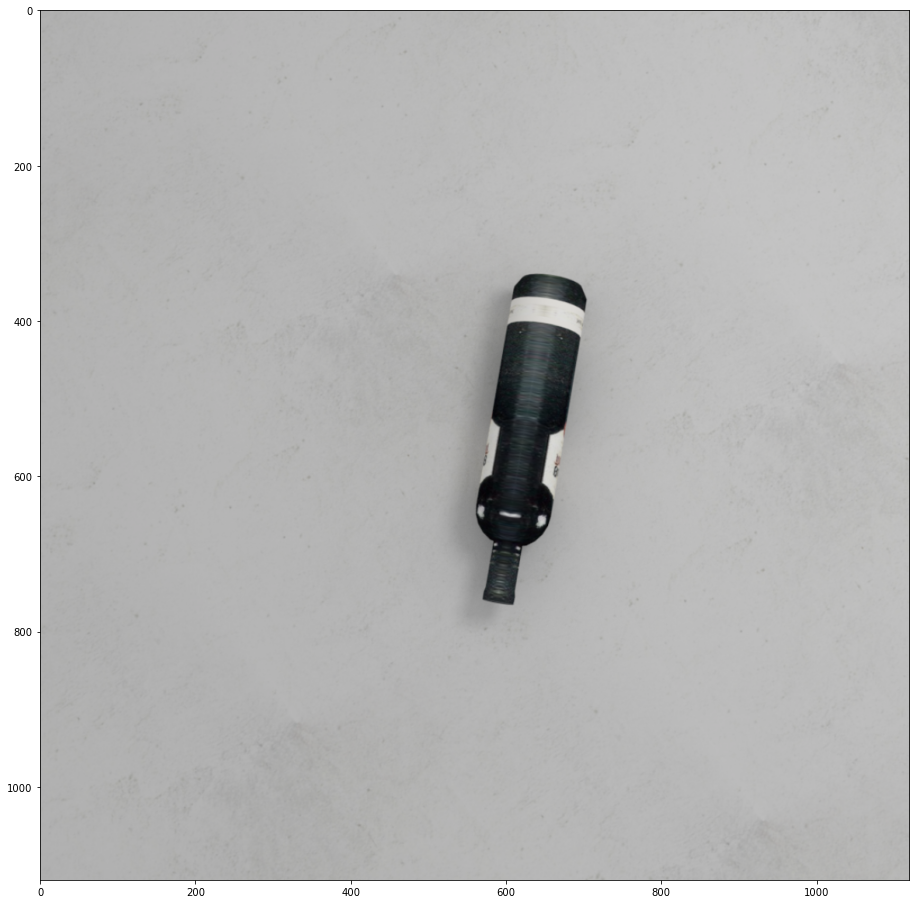

In [129]:
plt.figure(figsize=(16,16))
plt.imshow(img+ vis_img)